# Task 1 - LULC tile location map

## General instructions

First, update the following cell to have a link to your Homework 4 GitHub repository

**UPDATE THIS LINK** https://github.com/carmengg/eds-220-hwk-4

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now.

## Overview
The goal of this task is to create a simple map showing the location of the LULC tile section we used in the previous discussion section relative to the state of California and Mount Whitney. 

## About the data

In this task you will use two datsets:

**First dataset**

A small section of the GAP/LANDFIRE National Terrestrial Ecosystems data for 2011, from the US Geological Survey (USGS). This is a raster file with a 30 m x 30 m pixel resolution. Each cell in the raster has a number representing the type of land cover.

The data was pre-processed in the Microsoft Planetary Computer to show a small region around Mount Whitney in California.

Further information about the dataset can be accessed via the the dataset’s Digital Object Identifier (DOI) link:

U.S. Geological Survey (USGS) Gap Analysis Project (GAP), 2016, GAP/LANDFIRE National Terrestrial Ecosystems 2011: U.S. Geological Survey data release, https://doi.org/10.5066/F7ZS2TM0.

**Second dataset**

A shapefile of CA Geographic Boundaries. 
This is a subset of the US Census Bureau's 2016 TIGER database, which only has the state boundary.
[https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b](https://data.ca.gov/dataset/ca-geographic-boundaries/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b)

## File management
All your data files must be  inside a directory named 'data'  **in your gitignore**. 

## Data access
The .tif file (same as we used in discussion section) is in the Canvas-week7-homework zip file. The California shapefile will be directly accessed via its URL.

## FINAL CODE
You will use the next cell at the end of the task. Leave it blank for now.

In [ ]:
### ===== FINAL CODE =====

## Import libraries and functions

In [2]:
# import libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import rioxarray as rioxr
import geopandas as gpd

#importing functions
from shapely.geometry import box
from shapely.geometry import Polygon
from shapely.geometry import Point

## Import data
Use the next two cells to:

1. Import the raster file and store it in a variable `lulc` and take a look at it.
2. Import the CA shapefile directly from the URL using `gpd.read_file()` and take a look at it. You can get it by right-clicking on the "Download" button. Store it as a variable named `ca`.

In [3]:
# 1
lulc = os.path.join(os.getcwd(),'data','land_cover.tif')
lulc = rioxr.open_rasterio(lulc)
lulc

<xarray.DataArray (band: 1, y: 3000, x: 3000)>
[9000000 values with dtype=uint16]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -2.031e+06 -2.031e+06 ... -1.941e+06 -1.941e+06
  * y            (y) float64 1.762e+06 1.762e+06 ... 1.672e+06 1.672e+06
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  2 (pixels/inch)
    TIFFTAG_SOFTWARE:        ERDAS IMAGINE
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

shape:  (1, 3000, 3000)
data type:  uint16 

<class 'numpy.ndarray'>


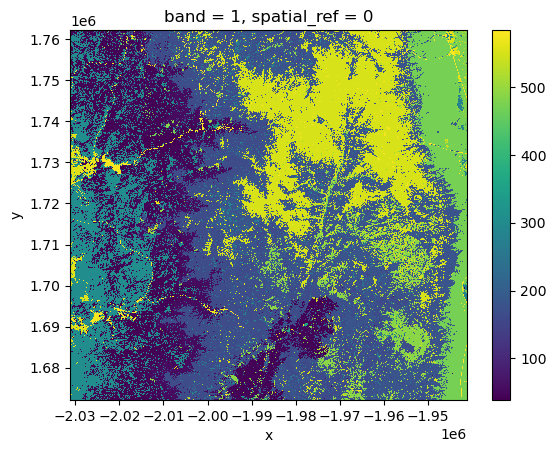

In [4]:
# exploration 
print('shape: ', lulc.shape)
print('data type: ', lulc.dtype, '\n')
print(type(lulc.values))
lulc.values
lulc.plot()

In [5]:
#further exploration 
print('# bands: ', lulc.rio.count)
print('height: ', lulc.rio.height)
print('width: ', lulc.rio.width, '\n')

print('spatial bounding box: ')
print(lulc.rio.bounds(), '\n')

print('CRS: ', lulc.rio.crs)

# bands:  1
height:  3000
width:  3000 

spatial bounding box: 
(-2031135.0, 1672215.0, -1941135.0, 1762215.0) 

CRS:  EPSG:5070


In [17]:
# 2
ca = gpd.read_file('https://data.ca.gov/dataset/e212e397-1277-4df3-8c22-40721b095f33/resource/3db1e426-fb51-44f5-82d5-a54d7c6e188b/download/ca-state-boundary.zip')
ca

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-13317677.375 3930590.808, -13..."


## Bounding box
Create a `geopands.GeoDataFrame` named `bbox` with the lulc bounding box. 

In [6]:
bbox = gpd.GeoDataFrame(lulc.rio.bounds())
print(bbox)

           0
0 -2031135.0
1  1672215.0
2 -1941135.0
3  1762215.0


In [ ]:
# your code here


## Mount Whitney point
Create a `geopands.GeoDataFrame` named `mt_whitney` having the coordinates of Mount Whitney as a single point. You will need to look up Mount Whitney's coordinates. HINT: [`shapely.Point()`](https://shapely.readthedocs.io/en/stable/reference/shapely.Point.html)

In [41]:
# your code here
mt_whitney = Point([36.5785, -118.2923])
print(mt_whitney)
mt_whitney.y
mt_whitney.x


POINT (36.5785 -118.2923)


36.5785

In [14]:
bbox

,0
0,-2031135.0
1,1672215.0
2,-1941135.0
3,1762215.0


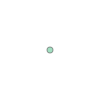

In [15]:
mt_whitney

In [34]:
mt_whitney = geopandas.GeoDataFrame(mt_whitney)
mt_whitney = mt_whitney.set_crs('epsg:3857')

NameError: name 'geopandas' is not defined

In [25]:
ca.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [43]:
bbox.set_geometry

<bound method GeoDataFrame.set_geometry of            0
0 -2031135.0
1  1672215.0
2 -1941135.0
3  1762215.0>

<AxesSubplot:>

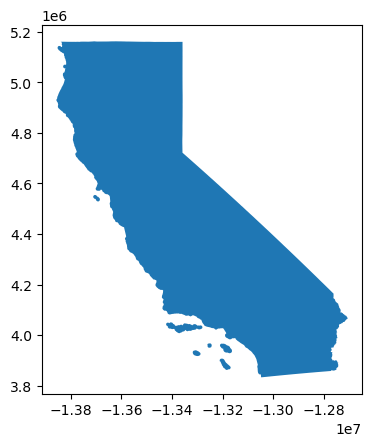

In [19]:
ca.plot()

## Updates
If there are any updates needed to the data, perform them in the next cells (you may add as many as you need). 
At the top of each one, include a comment explaining what is happening in that cell's code.

In [26]:
# your code here
# original dimensions and coordinates
print(lulc.dims, lulc.coords,'\n')

# remove length 1 dimension (band)
lulc = lulc.squeeze()
print(lulc.dims, lulc.coords,'\n')

# remove coordinates associated to band
lulc = lulc.drop('band')
print(lulc.dims, lulc.coords)


('y', 'x') Coordinates:
    band         int64 1
  * x            (x) float64 -2.031e+06 -2.031e+06 ... -1.941e+06 -1.941e+06
  * y            (y) float64 1.762e+06 1.762e+06 ... 1.672e+06 1.672e+06
    spatial_ref  int64 0 

('y', 'x') Coordinates:
    band         int64 1
  * x            (x) float64 -2.031e+06 -2.031e+06 ... -1.941e+06 -1.941e+06
  * y            (y) float64 1.762e+06 1.762e+06 ... 1.672e+06 1.672e+06
    spatial_ref  int64 0 

('y', 'x') Coordinates:
  * x            (x) float64 -2.031e+06 -2.031e+06 ... -1.941e+06 -1.941e+06
  * y            (y) float64 1.762e+06 1.762e+06 ... 1.672e+06 1.672e+06
    spatial_ref  int64 0


In [33]:
#  36°34′43″N 118°17′31″W / 36.578580925°N 118.29199495°W
lulc.max()
gc.max().item()

584

In [36]:
lulc.min()
lulc.min().item()

39

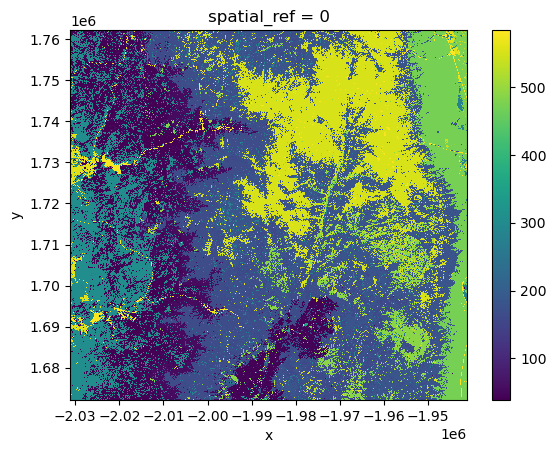

In [31]:
lulc.plot()

## Map

Create a map showing `bbox`, `ca` and `mt_whitney` similar to the one in the overview section. 
It must have at least the customizations shown in the sample map. 

HINTS:
1. to change the `marker_style`: https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html
2. to add the marker to the legend: https://matplotlib.org/stable/users/explain/axes/legend_guide.html and update parameter `linestyle='None'` in `mlines.Line2D`

In [37]:

bbox.set_crs(epsg=4326, inplace=True)

AttributeError: You are calling a geospatial method on the GeoDataFrame, but the active geometry column ('geometry') is not present. 
There are no existing columns with geometry data type. You can add a geometry column as the active geometry column with df.set_geometry. 

AttributeError: 'DataFrame' object has no attribute 'crs'

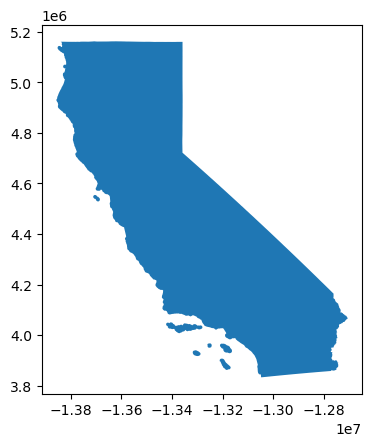

In [36]:
# your code here

fig, ax = plt.subplots()

ca.plot(ax=ax)
bbox.plot(ax=ax, color='green')

plt.show()


## Final code
Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The only ouput of this cell should be the graph you produced in the previous exercise. 

Add divisions for relevant sections and comment appropriately.
